In [217]:
#data processing
import numpy as np
import pandas as pd

#data visualisation
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Data

In [218]:
pre_pri = pd.read_excel("data/pre_pri.xlsx", index_col = 0)
pre_sec = pd.read_excel("data/pre_sec.xlsx", index_col = 0)
pre_total = pd.read_excel("data/pre_total.xlsx", index_col = 0)
pre_home_alone = pd.read_excel("data/pre_home_alone.xlsx", index_col = 0)

dur_pri = pd.read_excel("data/dur_pri.xlsx", index_col = 0)
dur_sec = pd.read_excel("data/dur_sec.xlsx", index_col = 0)
dur_total = pd.read_excel("data/dur_total.xlsx", index_col = 0)
dur_home_alone = pd.read_excel("data/dur_home_alone.xlsx", index_col = 0)

## Descriptive Statistics
**Note:** all values in hours

In [219]:
pre_pri.describe()[:3]

,Managing/taking medication,Monitoring health,Deliberate exercise,Preparing food/cleaning after food,Consuming food/drink,Sleep,Personal hygiene,Non-deliberate exercise,Shopping,Working,...,Resting,Driving,Planning/organising,Spending time with family members,Spending time with spouse,Spending time with friends,Tending domestic animals,Taking care of children/grandchildren,Participating in study,Missing
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.365385,0.211538,0.358974,0.596154,1.634615,8.192308,0.897436,1.102564,0.403846,1.660256,...,0.807692,0.698718,0.121795,0.192308,0.051282,0.358974,0.198718,0.211538,1.448718,0.615385
std,0.405570,0.348194,0.555162,0.600320,0.692851,1.480760,0.571697,0.987789,0.476499,2.745696,...,0.920981,0.781763,0.372850,0.482338,0.261488,1.021646,0.642943,0.619243,0.498373,1.357914


In [220]:
pre_sec.describe()[:3]

,Managing/taking medication,Monitoring health,Deliberate exercise,Preparing food/cleaning after food,Consuming food/drink,Sleep,Personal hygiene,Non-deliberate exercise,Shopping,Working,...,Resting,Driving,Planning/organising,Spending time with family members,Spending time with spouse,Spending time with friends,Tending domestic animals,Taking care of children/grandchildren,Participating in study,Missing
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.0,26.000000,26.000000,26.0,26.000000,...,26.0,26.0,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.102564,0.038462,0.006410,0.038462,0.121795,0.0,0.025641,0.089744,0.0,0.006410,...,0.0,0.0,0.051282,0.051282,0.051282,0.102564,0.006410,0.032051,0.314103,20.205128
std,0.163822,0.097840,0.032686,0.135873,0.242934,0.0,0.077349,0.150781,0.0,0.032686,...,0.0,0.0,0.229827,0.204229,0.181164,0.522976,0.032686,0.163430,0.870922,3.052979


In [221]:
pre_total.describe()[:3]

,Managing/taking medication,Monitoring health,Deliberate exercise,Preparing food/cleaning after food,Consuming food/drink,Sleep,Personal hygiene,Non-deliberate exercise,Shopping,Working,...,Resting,Driving,Planning/organising,Spending time with family members,Spending time with spouse,Spending time with friends,Tending domestic animals,Taking care of children/grandchildren,Participating in study,Missing
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.467949,0.250000,0.365385,0.634615,1.756410,8.192308,0.923077,1.192308,0.403846,1.666667,...,0.807692,0.698718,0.173077,0.243590,0.102564,0.461538,0.205128,0.243590,1.762821,20.820513
std,0.461926,0.368932,0.551804,0.646390,0.750157,1.480760,0.581628,1.096147,0.476499,2.750354,...,0.920981,0.781763,0.438383,0.533814,0.309397,1.160754,0.645166,0.750157,1.111728,3.727353


In [222]:
pre_home_alone.describe()[:3]

,Home,Not Home,Missing_home,Alone,Not Alone,Missing_alone
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,12.705128,3.051282,8.243590,6.173077,6.948718,10.878205
std,3.396831,3.163251,1.522593,5.472452,5.358435,5.495970


In [223]:
dur_pri.describe()[:3]

,Managing/taking medication,Monitoring health,Deliberate exercise,Preparing food/cleaning after food,Consuming food/drink,Sleep,Personal hygiene,Non-deliberate exercise,Shopping,Working,...,Resting,Driving,Planning/organising,Spending time with family members,Spending time with spouse,Spending time with friends,Tending domestic animals,Taking care of children/grandchildren,Participating in study,Missing
count,15.000000,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.0,15.000000,15.0,15.0,15.000000,15.0
mean,0.266667,0.0,0.333333,0.655556,2.000000,8.511111,0.411111,2.255556,0.633333,0.633333,...,2.733333,0.811111,0.011111,0.322222,0.0,0.066667,0.0,0.0,0.011111,0.0
std,0.518698,0.0,0.766356,0.984940,0.729209,2.408209,0.371967,3.502758,1.252299,2.452889,...,5.029989,1.996889,0.043033,0.640767,0.0,0.258199,0.0,0.0,0.043033,0.0


In [224]:
dur_sec.describe()[:3]

,Managing/taking medication,Monitoring health,Deliberate exercise,Preparing food/cleaning after food,Consuming food/drink,Sleep,Personal hygiene,Non-deliberate exercise,Shopping,Working,...,Resting,Driving,Planning/organising,Spending time with family members,Spending time with spouse,Spending time with friends,Tending domestic animals,Taking care of children/grandchildren,Participating in study,Missing
count,15.0,15.0,15.0,15.000000,15.000000,15.000000,15.0,15.000000,15.0,15.0,...,15.000000,15.0,15.000000,15.000000,15.0,15.000000,15.0,15.0,15.0,15.000000
mean,0.0,0.0,0.0,0.088889,0.200000,0.100000,0.0,0.166667,0.0,0.0,...,0.755556,0.0,0.233333,1.111111,0.0,0.133333,0.0,0.0,0.0,8.966667
std,0.0,0.0,0.0,0.266270,0.455129,0.258199,0.0,0.523268,0.0,0.0,...,1.149304,0.0,0.903696,2.192761,0.0,0.516398,0.0,0.0,0.0,5.496464


In [225]:
dur_total.describe()[:3]

,Managing/taking medication,Monitoring health,Deliberate exercise,Preparing food/cleaning after food,Consuming food/drink,Sleep,Personal hygiene,Non-deliberate exercise,Shopping,Working,...,Resting,Driving,Planning/organising,Spending time with family members,Spending time with spouse,Spending time with friends,Tending domestic animals,Taking care of children/grandchildren,Participating in study,Missing
count,15.000000,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.0,15.000000,15.0,15.0,15.000000,15.000000
mean,0.266667,0.0,0.333333,0.744444,2.200000,8.611111,0.411111,2.422222,0.633333,0.633333,...,3.488889,0.811111,0.244444,1.433333,0.0,0.200000,0.0,0.0,0.011111,8.966667
std,0.518698,0.0,0.766356,1.040579,0.994429,2.514771,0.371967,3.968560,1.252299,2.452889,...,4.845415,1.996889,0.901645,2.239437,0.0,0.560612,0.0,0.0,0.043033,5.496464


In [226]:
dur_home_alone.describe()[:3]

,Home,Not Home,Missing_home,Alone,Not Alone,Missing_alone
count,15.000000,15.000000,11.000000,15.000000,15.000000,11.000000
mean,14.022222,5.333333,7.500000,15.522222,3.833333,7.500000
std,8.851703,7.305412,3.357413,5.606780,3.307039,3.357413


**Note:** there are 4 respondents who recorded greater than 24 hours, hence their 'Missing_home' and 'Missing_alone' columns were recorded as negative values, which have turned into null values.

## Data Visualisation

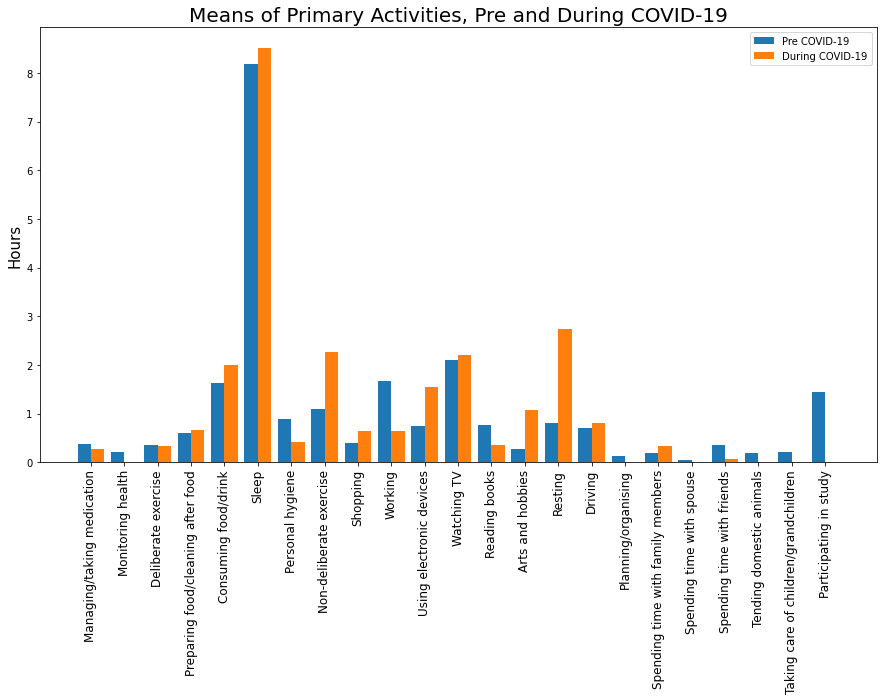

In [227]:
fig, ax = plt.subplots(figsize=(15, 8))
x=np.arange(23)
bar_width = 0.4

ax.bar(x, pre_pri.mean()[:-1], width=bar_width, label='Pre COVID-19')
ax.bar(x+bar_width, dur_pri.mean()[:-1], width=bar_width, label='During COVID-19')

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_pri.columns[1:-1], rotation=90, size=12)
ax.set_title('Means of Primary Activities, Pre and During COVID-19', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()

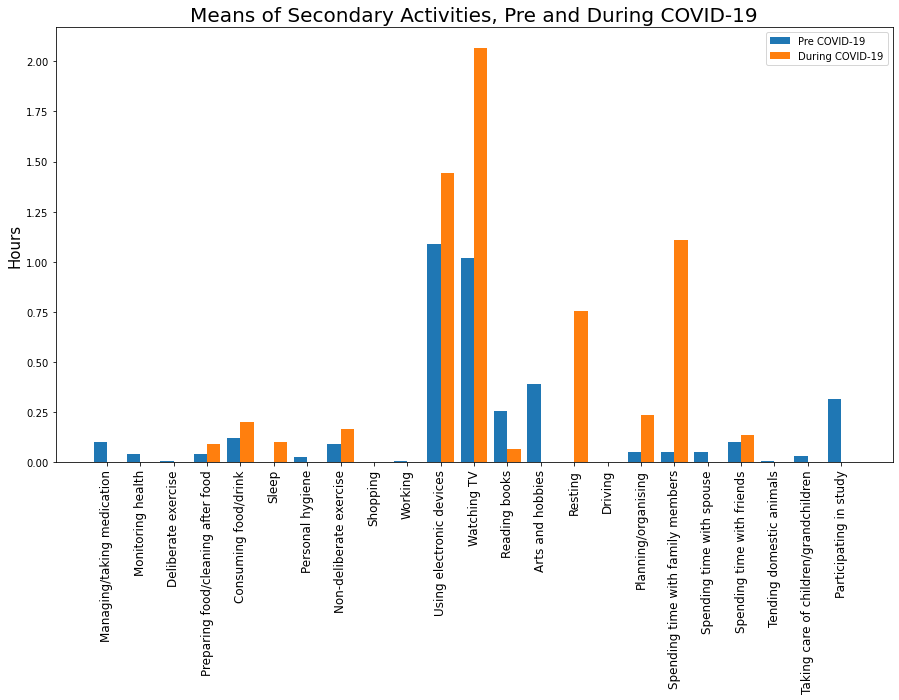

In [228]:
fig, ax = plt.subplots(figsize=(15, 8))
x=np.arange(23)
bar_width = 0.4

ax.bar(x, pre_sec.mean()[:-1], width=bar_width, label='Pre COVID-19')
ax.bar(x+bar_width, dur_sec.mean()[:-1], width=bar_width, label='During COVID-19')

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_pri.columns[1:-1], rotation=90, size=12)
ax.set_title('Means of Secondary Activities, Pre and During COVID-19', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()

**Note:** y-axis scaled to 2 hours instead of 8

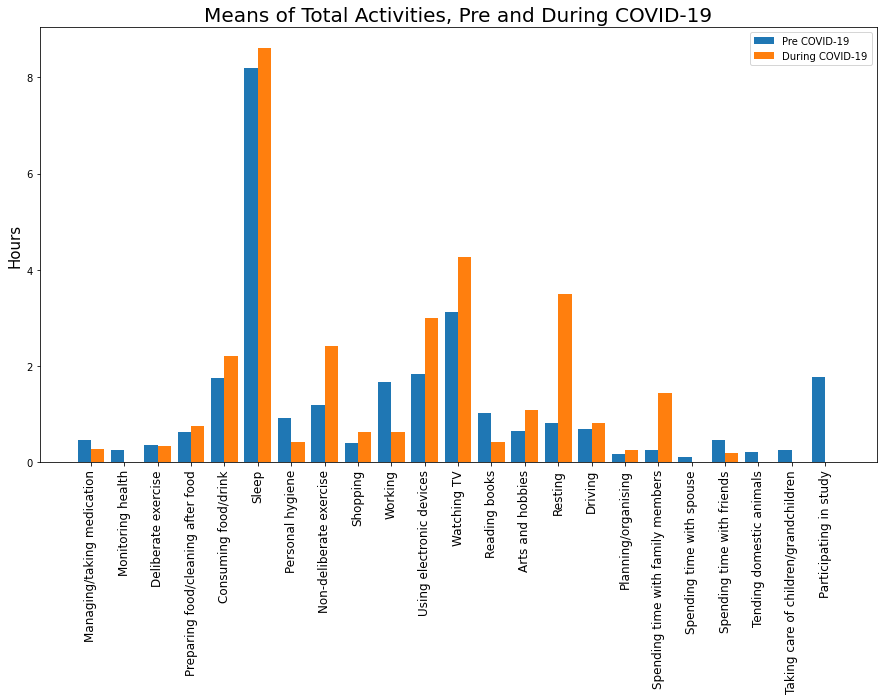

In [229]:
fig, ax = plt.subplots(figsize=(15, 8))
x=np.arange(23)
bar_width = 0.4

ax.bar(x, pre_total.mean()[:-1], width=bar_width, label='Pre COVID-19')
ax.bar(x+bar_width, dur_total.mean()[:-1], width=bar_width, label='During COVID-19')

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_pri.columns[1:-1], rotation=90, size=12)
ax.set_title('Means of Total Activities, Pre and During COVID-19', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()

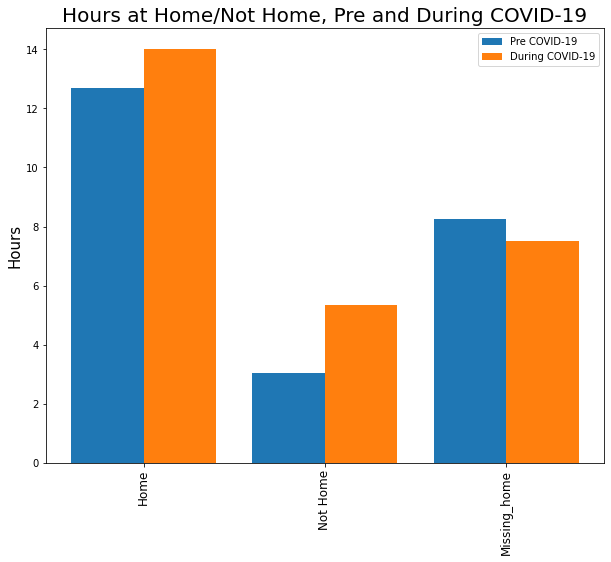

In [230]:
fig, ax = plt.subplots(figsize=(10, 8))
x=np.arange(3)
bar_width = 0.4

ax.bar(x, pre_home_alone.mean()[:3], width=bar_width, label='Pre COVID-19')
ax.bar(x+bar_width, dur_home_alone.mean()[:3], width=bar_width, label='During COVID-19')

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_home_alone.columns[1:], rotation=90, size=12)
ax.set_title('Hours at Home/Not Home, Pre and During COVID-19', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()

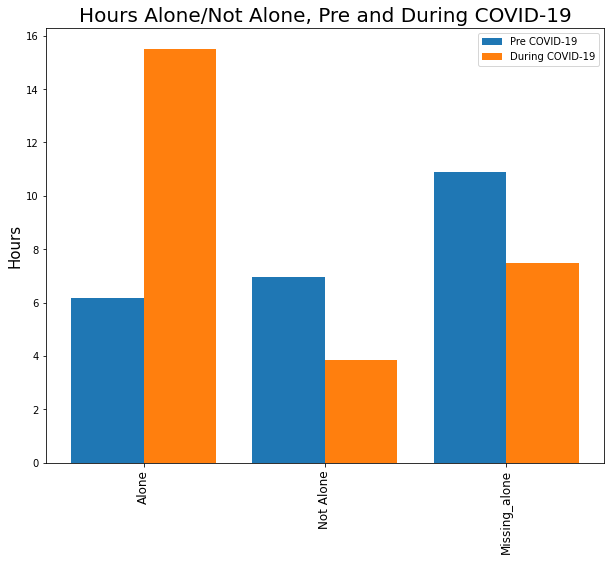

In [231]:
fig, ax = plt.subplots(figsize=(10, 8))
x=np.arange(3)
bar_width = 0.4

ax.bar(x, pre_home_alone.mean()[3:], width=bar_width, label='Pre COVID-19')
ax.bar(x+bar_width, dur_home_alone.mean()[3:], width=bar_width, label='During COVID-19')

ax.set_xticks(x+bar_width/2)
ax.set_xticklabels(pre_home_alone.columns[4:], rotation=90, size=12)
ax.set_title('Hours Alone/Not Alone, Pre and During COVID-19', size=20)
ax.set_ylabel('Hours', size=15)
ax.legend()